## Set-up of analysis

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, perform_experiments,
                           ema_logging, Constant)

from ema_workbench.connectors.pysd_connector import PysdModel
from ema_workbench.connectors.vensim import VensimModel

from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

from ema_workbench.analysis.plotting import lines, Density

In [39]:
wd = 'model/'

In [78]:
#import model
lithium_model = VensimModel("LithiumModel", wd = wd, model_file = 'Li_7june.vpmx')


In [79]:
#initialize uncertainties and outcomes of interest
uncertainties = [RealParameter('Base energy use lithium per tonne', 500, 800),
                 RealParameter('Initial average lifetime of metal in use', 8, 15),
                 RealParameter('Increase in demand stationary storage', 0.2, 0.5),
                 RealParameter('Initial price per tonne LiCo3', 14000, 20000)] 

outcomes = [TimeSeriesOutcome('TIME'),
            TimeSeriesOutcome('Total demand[Lithium]'),
            TimeSeriesOutcome('Real price[Lithium]')]


In [80]:
lithium_model.uncertainties = uncertainties
lithium_model.outcomes = outcomes
nr_experiments = 50

In [81]:
ema_logging.log_to_stderr(ema_logging.INFO)
experiments, outcomes = perform_experiments([lithium_model],
                                  nr_experiments, uncertainty_sampling=LHS)

[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 5 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 15 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 25 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 35 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 45 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] experiments finished


In [82]:
experiments

,Base energy use lithium per tonne,Increase in demand stationary storage,Initial average lifetime of metal in use,Initial price per tonne LiCo3,scenario,policy,model
0,672.674306,0.294949,13.061387,14364.596691,750,None,LithiumModel
1,596.893390,0.400536,13.008775,19533.508386,751,None,LithiumModel
2,652.465225,0.366699,14.761162,17892.636387,752,None,LithiumModel
3,711.041162,0.460849,9.010014,14836.020786,753,None,LithiumModel
4,534.722079,0.296358,14.959307,18662.443650,754,None,LithiumModel
5,570.473379,0.498137,10.620787,19439.605308,755,None,LithiumModel
6,624.184971,0.255463,14.295923,15466.174043,756,None,LithiumModel
7,536.189210,0.359332,11.487801,18523.958218,757,None,LithiumModel
8,700.612359,0.287375,13.311568,14984.345397,758,None,LithiumModel
9,725.420626,0.216644,10.813957,15679.963646,759,None,LithiumModel


In [83]:
outcomes

{'TIME': array([[ 0.  ,  0.25,  0.5 , ..., 49.5 , 49.75, 50.  ],
        [ 0.  ,  0.25,  0.5 , ..., 49.5 , 49.75, 50.  ],
        [ 0.  ,  0.25,  0.5 , ..., 49.5 , 49.75, 50.  ],
        ...,
        [ 0.  ,  0.25,  0.5 , ..., 49.5 , 49.75, 50.  ],
        [ 0.  ,  0.25,  0.5 , ..., 49.5 , 49.75, 50.  ],
        [ 0.  ,  0.25,  0.5 , ..., 49.5 , 49.75, 50.  ]], dtype=float32),
 'Total demand[Lithium]': array([[1.5432341e+08, 1.5543354e+08, 1.5737939e+08, ..., 1.7908454e+09,
         1.8115108e+09, 1.8322496e+09],
        [1.5432341e+08, 1.5544499e+08, 1.5743259e+08, ..., 1.7889816e+09,
         1.8096500e+09, 1.8303956e+09],
        [1.5432341e+08, 1.5544146e+08, 1.5741630e+08, ..., 1.7887131e+09,
         1.8093600e+09, 1.8300814e+09],
        ...,
        [1.5432341e+08, 1.5545336e+08, 1.5746715e+08, ..., 1.7916902e+09,
         1.8122894e+09, 1.8329608e+09],
        [1.5432341e+08, 1.5544544e+08, 1.5743370e+08, ..., 1.7921203e+09,
         1.8127839e+09, 1.8335223e+09],
        [1.5

In [84]:
outcomes.keys()

dict_keys(['TIME', 'Total demand[Lithium]', 'Real price[Lithium]'])

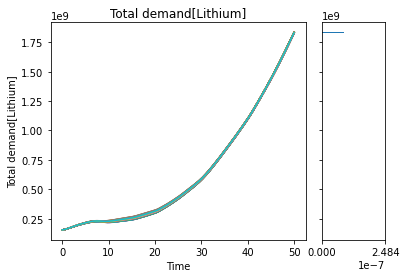

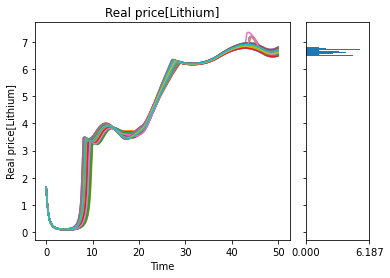

In [85]:
from ema_workbench.analysis import plotting, plotting_util

for outcome in list(outcomes)[1:]:
    plotting.lines(experiments, outcomes, outcomes_to_show=outcome, 
                   density=plotting_util.Density.HIST)
plt.show()

## Initialize PRIM

In [86]:
import ema_workbench.analysis.prim as prim